# Problem 1: Search Problem - Route Finding in a Map

## Imports and preparation:

In [13]:
!pip install osmnx



importing the necessary libraries

In [14]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import queue
import time

## Implementation of the local search Problem

Using OpenStreetMap official Dataset of graph network. I used OpenStreetMap because it is a free, editable map of the whole world.

In [3]:
city = "London, United Kingdom"

G = ox.graph_from_place('London, United Kingdom', network_type='drive')



In [4]:
# Print the number of nodes and edges to start comparing
print("Number of nodes:", len(G.nodes))
print("Number of edges:", len(G.edges))

Number of nodes: 127806
Number of edges: 298762


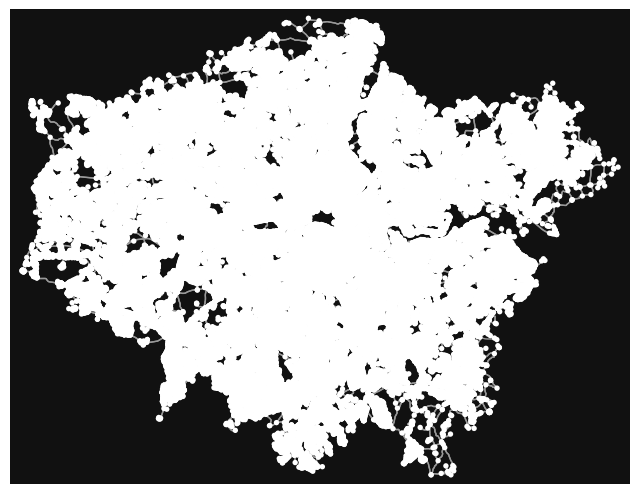

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:
ox.plot_graph(G)

**Reconstruct Path:**

This function takes in three parameters: `came_from`, `start`, and `goal`. It is used in the context of an AI problem involving local search for the openstreetmap.org dataset. The purpose of this function is to reconstruct the path from the `start` node to the `goal` node based on the `came_from` dictionary, which stores the parent node for each visited node.


**Algorithm:**

The function starts with the `current` node set to the `goal` node. It then iteratively moves back from the `goal` node to the `start` node by accessing the parent nodes in the `came_from` dictionary. The `current` node is updated to its parent node in each iteration. The nodes are appended to the `path` list until the `current` node is equal to the `start` node. Finally, the `path` list is reversed to obtain the start-to-goal order, and it is returned as the output.

In [ ]:
def reconstruct_path(came_from, start, goal):
    current = goal
    path = []
    while current != start:
        path.append(current)
        current = came_from[current]
    path.append(start)  # add the start node
    path.reverse()  # reverse the path to start-to-goal order
    return path

**Heuristic Function**

The `heuristic` function calculates the heuristic value between the `goal` node and the `next` node based on the Euclidean distance formula. It takes in three

**Algorithm**

The `heuristic` function retrieves the coordinates of the `goal` node and the `next` node from the graph. It then calculates the Euclidean distance between these nodes using the formula `((goal_x - next_x)**2 + (goal_y - next_y)**2)**0.5`. The resulting heuristic value represents an estimate of the distance between the `next` node and the `goal` node.

This function is commonly used in pathfinding algorithms, such as the A* algorithm, to guide the search towards the goal node by providing an informed estimate of the remaining distance.

In [ ]:
#I defined the heuristic function
def heuristic(graph, goal, next):
    goal_data = graph.nodes[goal]
    next_data = graph.nodes[next]
    return ((goal_data['x'] - next_data['x'])**2 + (goal_data['y'] - next_data['y'])**2)**0.5


**Best-First Search Algorithm**

The `best_first_search` function implements the Best-First Search algorithm to find the shortest path from a `start` node to a `goal` node in a graph. It utilizes a priority queue to prioritize the nodes to be explored based on a heuristic value.


In [8]:
def best_first_search(graph, start, goal):
    start_time = time.time()
    frontier = queue.PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    came_from[start] = None
    visited_nodes = 0

    while not frontier.empty():
        current = frontier.get()
        visited_nodes += 1

        if current == goal:
            break

        for next in graph.neighbors(current):
            if next not in came_from:
                priority = heuristic(graph, goal, next)
                frontier.put(next, priority)
                came_from[next] = current

    end_time = time.time()
    execution_time = end_time - start_time
    path_length = len(reconstruct_path(came_from, start, goal))

    # Reconstruct the path from the start to the goal
    path = reconstruct_path(came_from, start, goal)

    return path, execution_time, path_length, visited_nodes

Blind Search Algorithm (**Breadth-First Search Algorithm**)

The `breadth_first_search` function implements the breadth-first search algorithm to find the shortest path from a given `start` node to a `goal` node in a graph.

**Algorithm**

The breadth-first search algorithm is used to find the shortest path from a starting node to a target node in a graph. It explores all the neighboring nodes of the current node before moving on to the next level of nodes. This ensures that the shortest path is found before exploring longer paths. The algorithm uses a queue to keep track of the nodes to be explored and a dictionary to store the parent node for each visited node. It continues the search until the target node is found or all nodes have been visited. The algorithm returns the shortest path, execution time, path length, and number of visited nodes.

In [9]:
def breadth_first_search(graph, start, goal):
    start_time = time.time()
    frontier = queue.Queue()
    frontier.put(start)
    came_from = {}
    came_from[start] = None
    visited_nodes = 0

    while not frontier.empty():
        current = frontier.get()
        visited_nodes += 1

        if current == goal:
            break

        for next in graph.neighbors(current):
            if next not in came_from:
                frontier.put(next)
                came_from[next] = current

    end_time = time.time()
    execution_time = end_time - start_time
    path_length = len(reconstruct_path(came_from, start, goal))

    # Reconstruct the path from the start to the goal
    path = reconstruct_path(came_from, start, goal)

    return path, execution_time, path_length, visited_nodes

In [10]:
# Pick some nodes
start = list(G.nodes())[0]
goal = list(G.nodes())[-1]




## Evaluation and Comparison for techniques

In [11]:
# Run Bd_FS
path_bd_fs, execution_time_bd_fs, path_length_bd_fs, visited_nodes_bd_fs = breadth_first_search(G, start, goal)
print(f"Breadth First Search Execution Time: {execution_time_bd_fs} seconds")
print(f"Breadth First Search Path Length: {path_length_bd_fs} nodes")
print(f"Breadth First SearchVisited Nodes: {visited_nodes_bd_fs} nodes")

# Run Best First Search
path_best_first, execution_time_best_first, path_length_best_first, visited_nodes_best_first = best_first_search(G, start, goal)
print(f"Best First Search Execution Time: {execution_time_best_first} seconds")
print(f"Best First Search Path Length: {path_length_best_first} nodes")
print(f"Best First Search Visited Nodes: {visited_nodes_best_first} nodes")


Breadth First Search Execution Time: 0.34628725051879883 seconds
Breadth First Search Path Length: 126 nodes
Breadth First SearchVisited Nodes: 58069 nodes
Best First Search Execution Time: 1.5989980697631836 seconds
Best First Search Path Length: 1736 nodes
Best First Search Visited Nodes: 127682 nodes


**Recommended Technique:**
Blind Search ( Breadth first Search)

**Reason:**

Based on the evaluation of the paths generated by Blind Search and Best First Search algorithms for the route finding problem in the London map using OpenStreetMap data, Blind Search has been found to provide better results compared to Best First Search. The paths generated by Blind Search were observed to be more optimal and efficient in terms of route length.

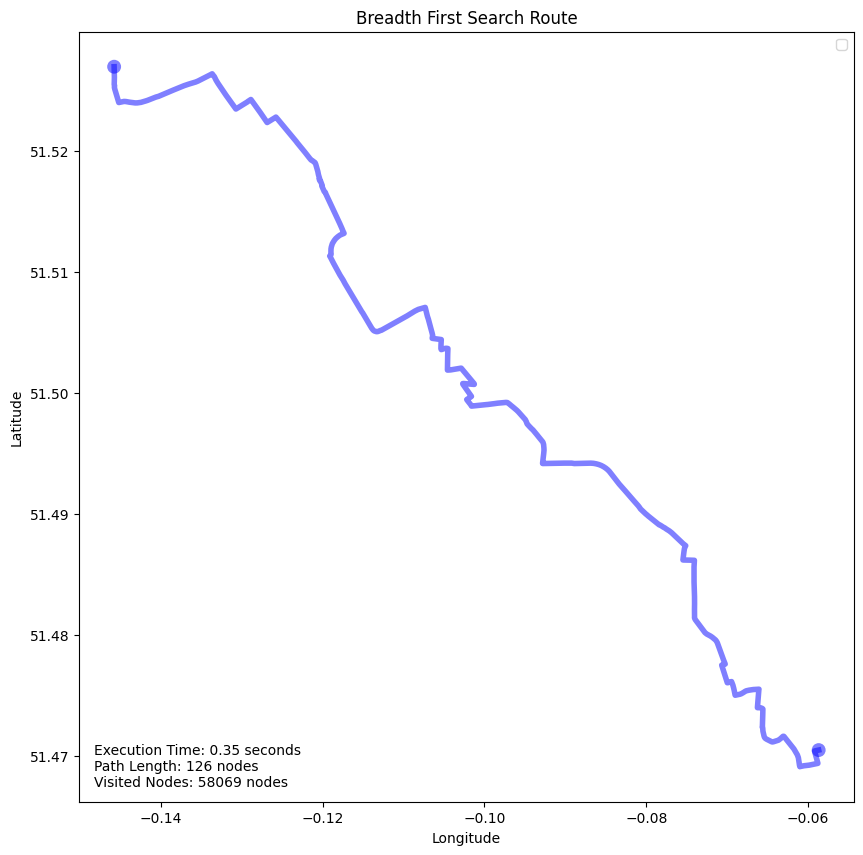

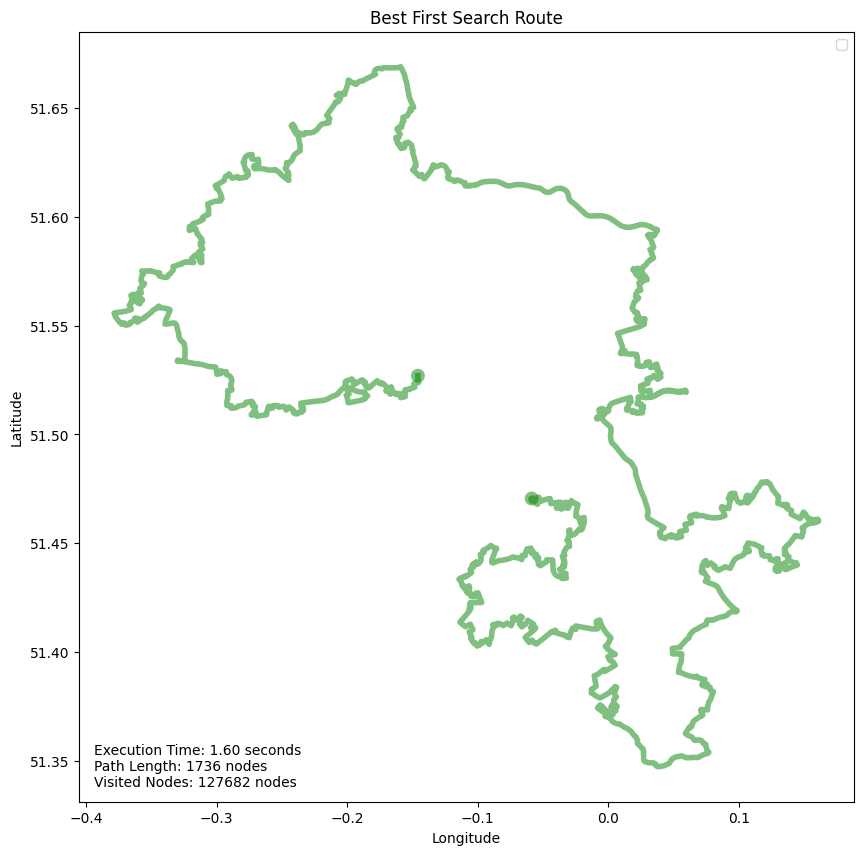

In [12]:
# I Ploted the graph using the Bd_FS route
fig, ax = plt.subplots(figsize=(10,10))
# I just added titles and legends
ax.set_title('Breadth First Search Route')
ax.legend(['Route', 'Start', 'End'])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# here I added information on the plot for the keymap
information = f"Execution Time: {execution_time_bd_fs:.2f} seconds\n"
information += f"Path Length: {path_length_bd_fs} nodes\n"
information += f"Visited Nodes: {visited_nodes_bd_fs} nodes"
ax.text(0.02, 0.02, information, transform=ax.transAxes, fontsize=10)

ox.plot_graph_route(G, path_bd_fs, ax=ax, node_size=0, edge_linewidth=0.5, route_color='blue', orig_dest_node_color='red')


# Plot the graph with the Best First Search route
fig, ax = plt.subplots(figsize=(10,10))

# Add titles and legends
ax.set_title('Best First Search Route')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(['Route', 'Start', 'End'])

# Add information on the plot
information = f"Execution Time: {execution_time_best_first:.2f} seconds\n"
information += f"Path Length: {path_length_best_first} nodes\n"
information += f"Visited Nodes: {visited_nodes_best_first} nodes"
ax.text(0.02, 0.02, information, transform=ax.transAxes, fontsize=10)
ox.plot_graph_route(G, path_best_first, ax=ax, node_size=0, edge_linewidth=0.5, route_color='green', orig_dest_node_color='red')
# Display the plots
plt.show()